In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import seaborn as sns


from tensorflow.keras.models import load_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [3]:
df=pd.read_csv(r'D:\Book\bankloan.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [5]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int32
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null float64
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null int32
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 46.9+ KB


In [6]:
pre_y=df['Loan_Status']
pre_X=df.drop('Loan_Status', axis=1)
dm_X=pd.get_dummies(pre_X)
dm_y=pre_y.map(dict(Y=1,N=0))
pre_y.shape
all_dm_col=dm_X.columns
dm_X.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [7]:
import pickle
from sklearn.externals import joblib
filename = 'allcol.pkl'
joblib.dump(dm_X, filename)

['allcol.pkl']

In [7]:
smote = SMOTE(ratio='minority')
X1,y =smote.fit_sample(dm_X,dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [8]:
Counter(y)

Counter({0: 332, 1: 332})

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, shuffle=True)

In [10]:
classifier = Sequential()
classifier.add(Dense(200,activation='relu',kernel_initializer='random_normal',input_dim=X_test.shape[1]))
classifier.add(Dense(400,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(4 ,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1 ,activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(X_train,y_train, batch_size=20, epochs=100, verbose=0)
eval_model=classifier.evaluate(X_train, y_train)
eval_model
                   


531/531 [==============================] - 0s 198us/sample - loss: 0.3476 - accuracy: 0.8757


[0.3476482133631877, 0.8757062]

In [13]:
classifier.save('my_model5.h5') 

In [14]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

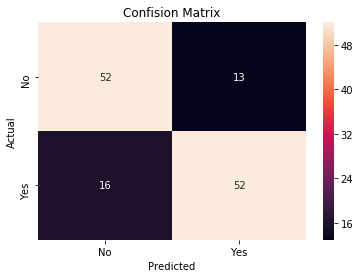

In [15]:
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax = ax);

ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Confision Matrix')
ax.set_yticks=([0,0])
ax.set_xticks=([-0.5,1.5])
ax.xaxis.set_ticklabels(['No','Yes']);
ax.yaxis.set_ticklabels(['No','Yes']);
